# Sigma(R) Reconstruction

Lensing is non-local because it depends on structure at all scales below $R$. This notebook demonstrates how to compute the _reconstructed_ $\Sigma(R)_Y$ profile, which is different than the true surface mass density of a halo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cluster_toolkit as ct
%matplotlib inline

In [2]:
plt.rc("text", usetex=True)
plt.rc("font", size=18, family="serif")

In [3]:
#Output path for plots
outpath = "../docs/source/figures/"

In [4]:
#This is our halo mass and concentration, and our one cosmology
Mass = 1e14 #Msun/h
conc = 5 #concentration
Omega_m = 0.3 #The only cosmological parameter we need

In [5]:
#Compute an NFW profile
NR = 1000
Rp = np.logspace(-2, 2.4, NR) #Mpc/h comoving
Sigma_nfw = ct.deltasigma.Sigma_nfw_at_R(Rp, Mass, conc, Omega_m)
DeltaSigma_nfw = ct.deltasigma.DeltaSigma_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m)

In [6]:
#Compute the reconstructed Sigma(R)_Y profile
Y = ct.sigma_reconstruction.Sigma_REC_from_DeltaSigma(Rp, DeltaSigma_nfw)

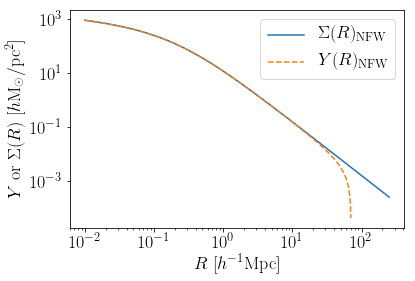

In [7]:
plt.loglog(Rp, Sigma_nfw, label=r"$\Sigma(R)_{\rm NFW}$")
plt.loglog(Rp[:-1], Y, "--", label=r"$Y(R)_{\rm NFW}$")
#plt.yscale("symlog")
plt.ylabel(r"$Y\ {\rm or}\ \Sigma(R)\ [h{\rm M_\odot}/{\rm pc}^2]$")
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}]$")
plt.legend()
#plt.savefig("sigma_reconstructed.png", dpi=300, bbox_inches="tight")